# A3 Peter Callahan, 9/10/23



Task I

In [ ]:
# Assignment 3 - Decision Tree

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/CD_additional_balanced.csv"
df = pd.read_csv(url)

# Display sample data
print("Sample data:")
print(df.head())

# Get data information
print("\nData information:")
print(df.info())

# Get data statistics
print("\nData statistics:")
print(df.describe())

# Check data shape
print("\nData shape:", df.shape)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Sample data:
   age           job   marital            education  default housing loan  \
0   41   blue-collar  divorced             basic.4y  unknown     yes   no   
1   49  entrepreneur   married    university.degree  unknown     yes   no   
2   49    technician   married             basic.9y       no      no   no   
3   41    technician   married  professional.course  unknown     yes   no   
4   45   blue-collar   married             basic.9y  unknown     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  eu

Task II

In [ ]:
# Prepare the target variable
y_target = df['y']

# Calculate and display the count and proportion of instances for each class of the target variable
class_counts = y_target.value_counts()
class_proportions = y_target.value_counts(normalize=True)

print("Class Counts:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)




Class Counts:
yes    4640
no     4640
Name: y, dtype: int64

Class Proportions:
yes    0.5
no     0.5
Name: y, dtype: float64


Task III


**Categorical:** Job, Marital, Education, Default, Housing, Loan, Contact, Month, Day_of_week, outcome
Y





**Quantitative:** age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed.


In [ ]:
# Data Preparation

# Identify categorical and quantitative features
categorical_features = ['marital', 'loan','job','education','default','housing','contact','month','day_of_week','poutcome', 'y']
quantitative_features = ['age', 'duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

# Convert categorical features to categorical data type
df[categorical_features] = df[categorical_features].astype('category')

# Transform the dataframe to one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Train and Evaluate Simple Decision Tree 1
print(df_encoded.head())




   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   41      1575         1    999         0           1.1          93.994   
1   49      1042         1    999         0           1.1          93.994   
2   49      1467         1    999         0           1.1          93.994   
3   41       579         1    999         0           1.1          93.994   
4   45       461         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_nov  month_oct  \
0          -36.4      4.857       5191.0  ...          0          0   
1          -36.4      4.857       5191.0  ...          0          0   
2          -36.4      4.857       5191.0  ...          0          0   
3          -36.4      4.857       5191.0  ...          0          0   
4          -36.4      4.857       5191.0  ...          0          0   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0                1              

In [ ]:
from sklearn.tree import DecisionTreeClassifier


Task IV

4B: The predictor variable that determines the 'split' is duration and the split condition is <=280.5. If 'duration <= 280.5' the model predicts yes, if >=280.5 model predicts no.

# 4C: reduction = -85 Reduction in mistakes


4D: Entropy is equal to 1 when there is an even distribution of clasees.

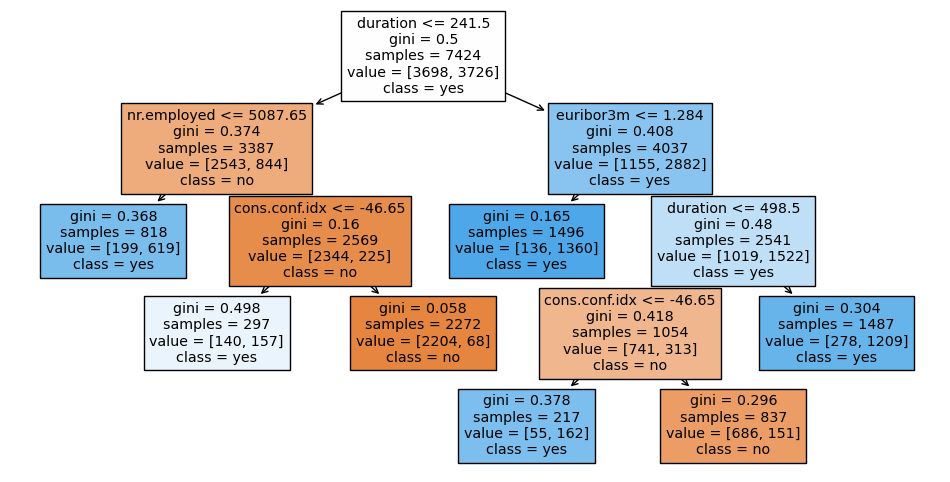

Reduction in Mistakes: 692
Confusion Matrix (Decision Tree 1):
[[751 191]
 [ 59 855]]

Classification Report (Decision Tree 1):
              precision    recall  f1-score   support

          no       0.93      0.80      0.86       942
         yes       0.82      0.94      0.87       914

    accuracy                           0.87      1856
   macro avg       0.87      0.87      0.86      1856
weighted avg       0.87      0.87      0.86      1856



In [ ]:
# Task 4 - Train and Evaluate Simple Decision Tree 1 to classify y

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns=['y_yes']), y_target, test_size=0.2, random_state=42)

# Fit a Decision Tree model with ccp_alpha to limit the tree to 2 leaf nodes
tree1 = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
tree1.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 6))
from sklearn.tree import plot_tree
plot_tree(tree1, filled=True, feature_names=X_train.columns, class_names=['no', 'yes'])
plt.show()

# Explain the root node and splitting value
# In a text block, explain the root node and the splitting value.

# Calculate how many less mistakes the model has made by splitting on the Root node predictor
# than it would have made by simply classifying all instances as the majority class.
majority_class = y_train.value_counts().idxmax()  # Find the majority class
y_pred_tree1 = tree1.predict(X_test)
mistakes_majority = sum(y_test != majority_class)
mistakes_tree1 = sum(y_test != y_pred_tree1)

reduction_in_mistakes = mistakes_majority - mistakes_tree1
print("Reduction in Mistakes:", reduction_in_mistakes)

# Explain why the Entropy is = 1 in the root node.
# In a text block, explain why the Entropy is equal to 1 in the root node.

# Predict using the Decision Tree 1 model
y_pred_tree1 = tree1.predict(X_test)

# Evaluate the model using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_tree1 = confusion_matrix(y_test, y_pred_tree1)
class_report_tree1 = classification_report(y_test, y_pred_tree1)

print("Confusion Matrix (Decision Tree 1):")
print(conf_matrix_tree1)
print("\nClassification Report (Decision Tree 1):")
print(class_report_tree1)


In [ ]:
# Check if there are still string columns in df_encoded
non_numeric_columns = df_encoded.select_dtypes(include=['object', 'category'])
print("Non-Numeric Columns in df_encoded:")
print(non_numeric_columns.head())

# Update X_train and X_test to include only numeric columns
X_train = df_encoded.loc[y_train.index]
X_test = df_encoded.loc[y_test.index]


Non-Numeric Columns in df_encoded:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [ ]:
# Create a new DataFrame with only the columns used during model training
X_train_trimmed = X_train.drop(columns=['y_yes'])

# Calculate mistakes by Decision Tree 1 on the training data
y_pred_train_tree1 = tree1.predict(X_train_trimmed)
mistakes_train_tree1 = sum(y_train != y_pred_train_tree1)

# Calculate reduction in mistakes
reduction_in_mistakes = mistakes_majority - mistakes_train_tree1

print("Mistakes by Majority Classifier:", mistakes_majority)
print("Mistakes by Decision Tree 1 (on training data):", mistakes_train_tree1)
print("Reduction in Mistakes:", reduction_in_mistakes)



Mistakes by Majority Classifier: 942
Mistakes by Decision Tree 1 (on training data): 1027
Reduction in Mistakes: -85


Task V

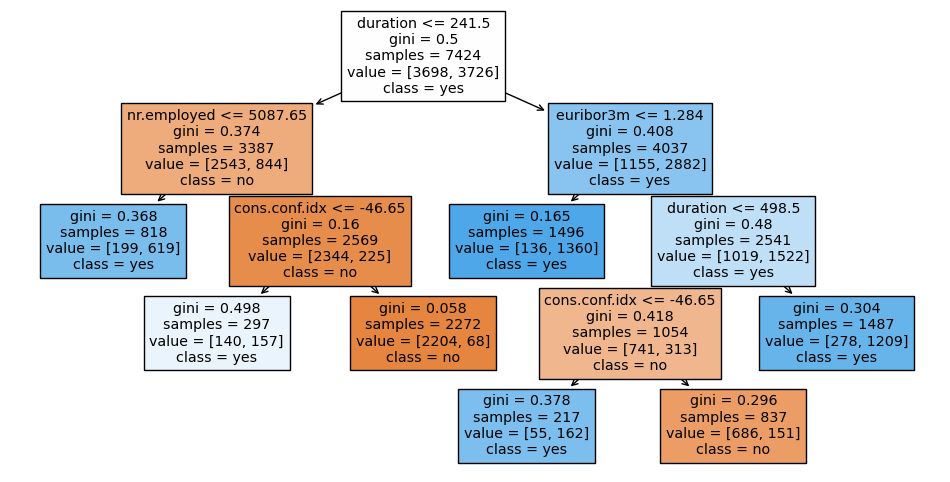

Confusion Matrix (Decision Tree 2):
[[751 191]
 [ 59 855]]

Classification Report (Decision Tree 2):
              precision    recall  f1-score   support

          no       0.93      0.80      0.86       942
         yes       0.82      0.94      0.87       914

    accuracy                           0.87      1856
   macro avg       0.87      0.87      0.86      1856
weighted avg       0.87      0.87      0.86      1856



In [ ]:
# Code Chunk 5 - Train and Evaluate more complex Decision Tree 2 to classify y

# Fit a simplified version of Decision Tree 1 by adjusting ccp_alpha
# Adjust ccp_alpha to find a tree with 4-10 leaf nodes
ccp_alphas = np.linspace(0.0, 1.0, 100)  # Adjust the range as needed
trees = []

for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    tree.fit(X_train_trimmed, y_train)
    if 4 <= tree.get_n_leaves() <= 10:
        trees.append(tree)

# Select the tree with desired leaf nodes (4-10)
selected_tree_index = 0  # You can adjust this index based on your desired tree
selected_tree = trees[selected_tree_index]

# Plot the selected tree
plt.figure(figsize=(12, 6))
from sklearn.tree import plot_tree
plot_tree(selected_tree, filled=True, feature_names=X_train_trimmed.columns, class_names=['no', 'yes'])
plt.show()

# Predict using the Decision Tree 2 model
y_pred_tree2 = selected_tree.predict(X_test.drop(columns=['y_yes']))

# Evaluate the model using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_tree2 = confusion_matrix(y_test, y_pred_tree2)
class_report_tree2 = classification_report(y_test, y_pred_tree2)

print("Confusion Matrix (Decision Tree 2):")
print(conf_matrix_tree2)
print("\nClassification Report (Decision Tree 2):")
print(class_report_tree2)



Task VI

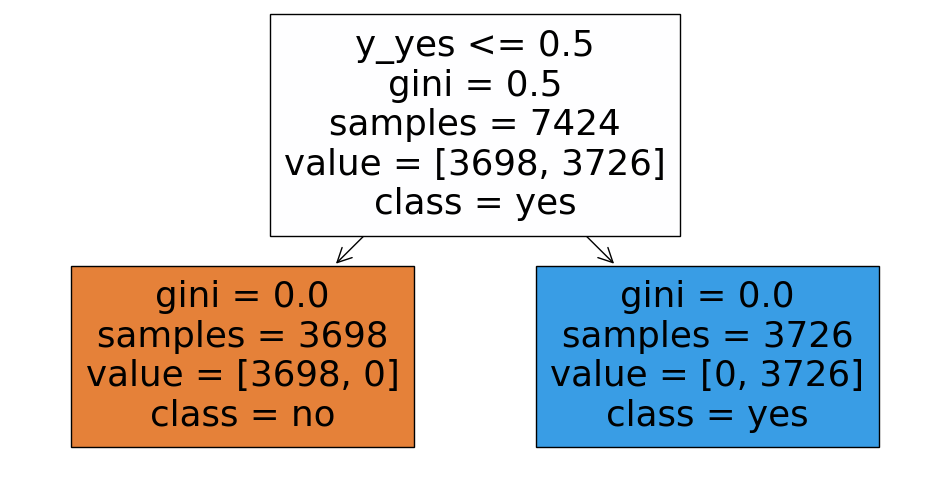

Confusion Matrix (Decision Tree 3):
[[942   0]
 [  0 914]]

Classification Report (Decision Tree 3):
              precision    recall  f1-score   support

          no       1.00      1.00      1.00       942
         yes       1.00      1.00      1.00       914

    accuracy                           1.00      1856
   macro avg       1.00      1.00      1.00      1856
weighted avg       1.00      1.00      1.00      1856



In [ ]:
# Task 6 - Duration Removed Decision Tree 3 to predict y

# Remove the 'duration' variable from predictors for Decision Tree 3
X_train_tree3 = X_train.drop(columns=['duration'])
X_test_tree3 = X_test.drop(columns=['duration'])

# Fit a model to classify y with the remaining predictors for Decision Tree 3
tree3 = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
tree3.fit(X_train_tree3, y_train)

# Plot the model for Decision Tree 3
plt.figure(figsize=(12, 6))
plot_tree(tree3, filled=True, feature_names=X_train_tree3.columns, class_names=['no', 'yes'])
plt.show()

# Predict using the Decision Tree 3 model
y_pred_tree3 = tree3.predict(X_test_tree3)

# Evaluate the model using confusion matrix and classification report
conf_matrix_tree3 = confusion_matrix(y_test, y_pred_tree3)
class_report_tree3 = classification_report(y_test, y_pred_tree3)

print("Confusion Matrix (Decision Tree 3):")
print(conf_matrix_tree3)
print("\nClassification Report (Decision Tree 3):")
print(class_report_tree3)

# Explain if the model performance has gone up or down. Why would removing 'duration' cause this change to occur?
# In a text block, explain whether the model performance has gone up or down after removing 'duration' and why.


6E: The model performance does go up, in tree 2 accuracy is .87
while in tree 3 the accuracy is bumped to 1.0 I believe this is a strong sign that duration as a variable in this specific case is crutial to the accuracy of the model

Task VII

In [ ]:
# Task 7 - Describe and compare the three models

# Compare the performance of the three models using Accuracy and F1 score
from sklearn.metrics import accuracy_score, f1_score

# Calculate accuracy and F1 score for each model
accuracy_tree1 = accuracy_score(y_test, y_pred_tree1)
f1_score_tree1 = f1_score(y_test, y_pred_tree1, average='weighted')

accuracy_tree2 = accuracy_score(y_test, y_pred_tree2)
f1_score_tree2 = f1_score(y_test, y_pred_tree2, average='weighted')

accuracy_tree3 = accuracy_score(y_test, y_pred_tree3)
f1_score_tree3 = f1_score(y_test, y_pred_tree3, average='weighted')

# Print the performance metrics for each model
print("Performance Metrics (Decision Tree 1):")
print(f"Accuracy: {accuracy_tree1:.2f}")
print(f"F1 Score: {f1_score_tree1:.2f}")

print("\nPerformance Metrics (Decision Tree 2):")
print(f"Accuracy: {accuracy_tree2:.2f}")
print(f"F1 Score: {f1_score_tree2:.2f}")

print("\nPerformance Metrics (Decision Tree 3):")
print(f"Accuracy: {accuracy_tree3:.2f}")
print(f"F1 Score: {f1_score_tree3:.2f}")

# Compare and contrast the results from the three models


Performance Metrics (Decision Tree 1):
Accuracy: 0.87
F1 Score: 0.86

Performance Metrics (Decision Tree 2):
Accuracy: 0.87
F1 Score: 0.86

Performance Metrics (Decision Tree 3):
Accuracy: 1.00
F1 Score: 1.00


Task VII:
It appears that Decision tree 3 outperformed both decision tree 1 and 2. Oddly enough the other two ended up with the same scores. My scores are ass follows

tree 1 accuracy: .87
f1 score: .86

tree 2 accuracy: .87
f1 score: .86

tree 3 accuracy:1.0
f1 score: 1.0

